In [1]:
from PIL import Image
import numpy as np

def load_gray_image(image_path):
    img = Image.open(image_path).convert("L")
    img_gray = np.array(img, dtype=np.uint8)
    return img_gray

In [2]:
def grayscale_to_8bit_binary(img_gray):
    H, W = img_gray.shape
    bin_img = [[None for _ in range(W)] for _ in range(H)]

    for i in range(H):
        for j in range(W):
            bin_img[i][j] = format(int(img_gray[i, j]), '08b')

    return bin_img


In [3]:
def flatten_binary_image(bin_img):
    bitstream = []

    for row in bin_img:
        for pixel_bin in row:
            bitstream.extend([int(b) for b in pixel_bin])

    return bitstream


In [4]:
def split_to_6bit_blocks(bitstream):
    padding = (6 - (__builtins__.len(bitstream) % 6)) % 6
    bitstream = bitstream + [0] * padding

    blocks_6bit = []
    for i in range(0, __builtins__.len(bitstream), 6):
        blocks_6bit.append(bitstream[i:i+6])

    return blocks_6bit


In [5]:
def preprocess_grayscale_to_6bit(image_path):
    img_gray = load_gray_image(image_path)
    bin_img = grayscale_to_8bit_binary(img_gray)
    bitstream = flatten_binary_image(bin_img)
    blocks_6bit = split_to_6bit_blocks(bitstream)

    return blocks_6bit, img_gray.shape, __builtins__.len(blocks_6bit)


In [ ]:

def reshape_blocks_to_2d(blocks_6bit, W_cover):

    M = len(blocks_6bit)
    H_needed = math.ceil(M / W_cover)

    # Padding blocks if necessary
    padded_blocks = blocks_6bit + [[0]*6] * (H_needed * W_cover - M)

    # Build 2D structure
    blocks_2d = []
    for y in range(H_needed):
        row = padded_blocks[y*W_cover : (y+1)*W_cover]
        blocks_2d.append(row)

    return blocks_2d


In [ ]:
def pad_2d_to_power_of_two(blocks_2d):

    H = len(blocks_2d)
    W = len(blocks_2d[0])

    H2 = 1 << math.ceil(math.log2(H))
    W2 = 1 << math.ceil(math.log2(W))

    zero_block = [0]*6

    # Pad rows
    for row in blocks_2d:
        row.extend([zero_block] * (W2 - W))

    # Pad columns
    for _ in range(H2 - H):
        blocks_2d.append([zero_block] * W2)

    return blocks_2d


In [8]:
def preprocess_grayscale_to_6bit_2d(image_path,l):
    img_gray = load_gray_image(image_path)
    bin_img = grayscale_to_8bit_binary(img_gray)
    bitstream = flatten_binary_image(bin_img)
    blocks_6bit = split_to_6bit_blocks(bitstream)
    blocks_2d=reshape_blocks_to_2d(blocks_6bit,l)
    blocks_padded= pad_2d_to_power_of_two(blocks_2d)
    return blocks_padded



In [9]:
img_gray = preprocess_grayscale_to_6bit_2d("secret_4x2.jpg",4)
img_gray

[[[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0],
  [0, 0, 1, 0, 0, 0],
  [1, 1, 1, 0, 0, 1]],
 [[0, 1, 0, 1, 1, 0],
  [1, 0, 0, 1, 1, 0],
  [1, 0, 1, 1, 1, 0],
  [0, 0, 1, 1, 0, 0]],
 [[1, 0, 1, 0, 1, 0],
  [0, 0, 1, 1, 0, 0],
  [1, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_secret_before_decomposition(secret_gray, title="Secret Image (Original)", save_path=None):
    
    plt.figure(figsize=(4, 4))
    plt.imshow(secret_gray, cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(title)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def display_secret_after_decomposition(img_gray_6, title="Secret Image After Decomposition", save_path=None):

    H = len(img_gray_6)
    W = len(img_gray_6[0])

    img = np.zeros((H, W), dtype=np.uint8)

    for i in range(H):
        for j in range(W):
            bits = img_gray_6[i][j]          # [b5,b4,b3,b2,b1,b0]
            value = int("".join(map(str, bits)), 2)
            img[i, j] = value                # 0–63

    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray", vmin=0, vmax=63)
    plt.axis("off")
    plt.title(title)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight", dpi=300)

    plt.show()


In [12]:
def load_gray_as_list(image_path):
    img_gray = load_gray_image(image_path)
    H, W = img_gray.shape
    bin_img = [[None for _ in range(W)] for _ in range(H)]

    for i in range(H):
        for j in range(W):
            bin_img[i][j] = int(img_gray[i, j])

    return bin_img
    

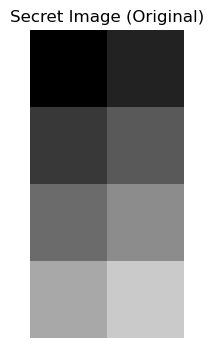

In [16]:
display_secret_before_decomposition(load_gray_image("secret_4x2.jpg"))

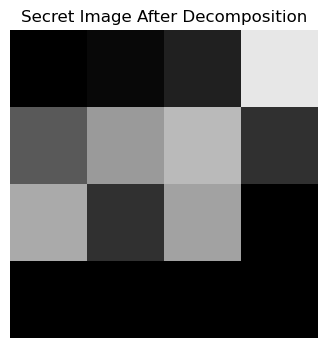

In [14]:
display_secret_after_decomposition(img_gray)